<font size="5" color="Red"> ch2. 군집분석 </font>

In [1]:
# sklearn 병렬처리를 하지 않도록 설정(Open Multi-Processing)
# 특정 군집분석 라이브러리가 joblib을 사용하면서 충돌 경고 메세지를 출력
import os
os.environ["OMP_NUM_THREADS"] = "1"

# 1절. 군집모형(=군집모델=클러스터링)
- 클러스터(cluster) : 독립변수의 특성이 유사한 데이터의 그룹
- 클러스터링(clustering) : 주어진 데이터를 여러개의 클러스터로 구분하는 것

1) 중심점 기반 클러스터링(K-Means) : https://commons.wikimedia.org/wiki/File:KMeans-Gaussian-data.svg
    <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/e5/KMeans-Gaussian-data.svg/434px-KMeans-Gaussian-data.svg.png?20111023112339" 
     style="display:block; margin-left:0; width:20%;">

2) 연결(밀도)기반 클러스터링(DBSCAN) : https://commons.wikimedia.org/wiki/File:DBSCAN-density-data.svg
    <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/05/DBSCAN-density-data.svg/320px-DBSCAN-density-data.svg.png?20201219120154"
     style="display:block; margin-left:0; width:20%;">

# 2절. K-Means 클러스터링
- 가장 단순하고 빠른 클러스터링 알고리즘
- 몇 개 클러스터로 나눌지 미리 지정해야 함

In [51]:
# 그래프 저장시 해상도 높게
%config InlineBackend.figure_format = 'retina'
# 패키지 import 
import matplotlib.pyplot as plt
import seaborn as sns
# 한글설정
plt.rc('font', family = 'Malgun Gothic') # 윈도우즈
plt.rc('axes', unicode_minus = False) # 축의 - 깨짐 방지

In [2]:
# 분류를 위한 가상 데이터 셋을 생성
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=20,# 데이터 갯수(기본값100)
                   n_features=2, # 독립변수 갯수(기본값20)
                   n_informative=2, # 종속변수에 영향을 주는 변수 갯수
                   n_redundant=0, # 종속변수에 영향을 안 미치는 변수 갯수
                   n_clusters_per_class=1, # 각 클래스당 군의 갯수(군에 서브 그룹이 없다)
                   n_classes=2, # 종속변수의 클래스 수
                   random_state=123 # 강사님과같은 값을 도출하기위해 seed값
                   )
X.shape, y.shape

((20, 2), (20,))

In [11]:
import numpy as np
np.c_[X, y][:3]

array([[ 1.03859554,  2.51175389,  0.        ],
       [ 1.00271366,  1.93521549,  0.        ],
       [-1.6881048 ,  0.02599427,  1.        ]])

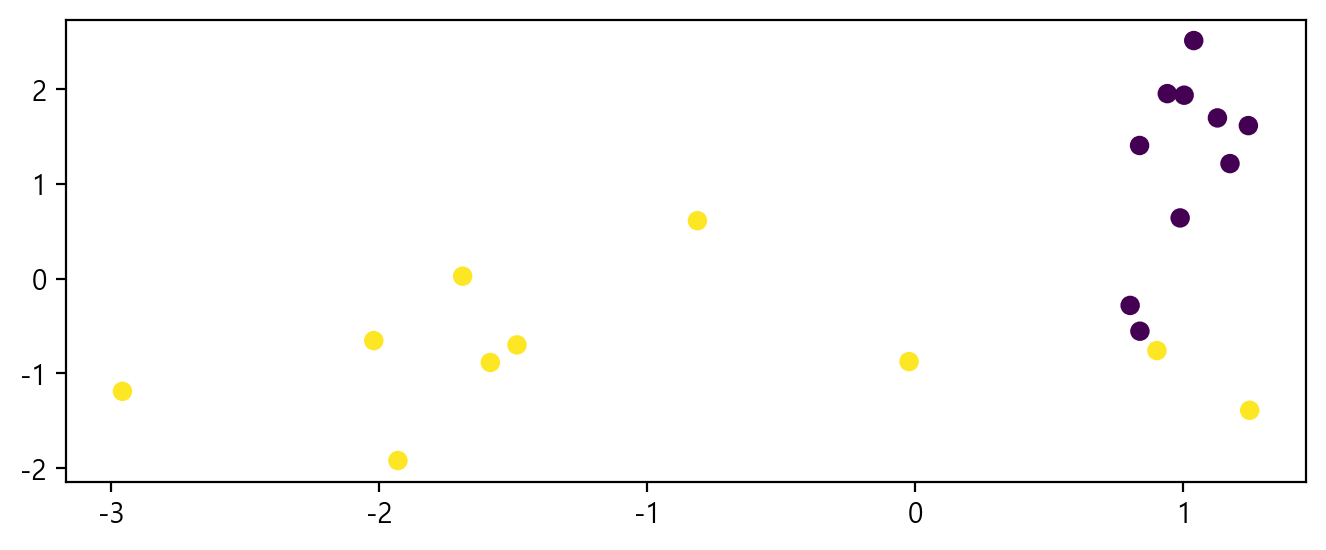

In [15]:
plt.figure(figsize=(8,3))
plt.scatter(x=X[:,0], y=X[:,1], c=y)
plt.show()

In [17]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=2, # 클러스터의 갯수
              init='random', # random중심초기점이 random), k-means++(멀리 떨어진 초기점)
              n_init=5,
              max_iter=300)
model.fit(X)

C:\Users\201-23\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(init='random', n_clusters=2, n_init=5)

In [19]:
X

array([[ 1.03859554,  2.51175389],
       [ 1.00271366,  1.93521549],
       [-1.6881048 ,  0.02599427],
       [ 0.90134424, -0.75896558],
       [ 0.83653082,  1.40488232],
       [-0.02317631, -0.87481215],
       [ 0.83780453, -0.554389  ],
       [-1.9295722 , -1.91894047],
       [-0.8124957 ,  0.61140818],
       [ 1.12694685,  1.69570061],
       [ 0.80138648, -0.28232585],
       [ 0.9399586 ,  1.9518949 ],
       [ 1.24232232,  1.6146173 ],
       [-1.48554751, -0.69890985],
       [ 1.24732102, -1.38872822],
       [-2.95714561, -1.18843377],
       [-1.5849172 , -0.88425569],
       [-2.0197379 , -0.65350646],
       [ 0.98786201,  0.64060416],
       [ 1.17380403,  1.21379918]])

In [20]:
model.cluster_centers_ # 최종 두 클러스터의 중심점

array([[-1.56258716, -0.69768199],
       [ 1.01138251,  0.83200493]])

In [23]:
pred = model.predict(X)
print("예측값 :", pred)
print("modelLabel:", model.labels_)
print("실제 y값 :", y)

예측값 : [1 1 0 1 1 0 1 0 0 1 1 1 1 0 1 0 0 0 1 1]
modelLabel: [1 1 0 1 1 0 1 0 0 1 1 1 1 0 1 0 0 0 1 1]
실제 y값 : [0 0 1 1 0 1 0 1 1 0 0 0 0 1 1 1 1 1 0 0]


In [30]:
# k-means가 0 그룹분류된 x데이터
X[model.labels_==0]

array([[-1.6881048 ,  0.02599427],
       [-0.02317631, -0.87481215],
       [-1.9295722 , -1.91894047],
       [-0.8124957 ,  0.61140818],
       [-1.48554751, -0.69890985],
       [-2.95714561, -1.18843377],
       [-1.5849172 , -0.88425569],
       [-2.0197379 , -0.65350646]])

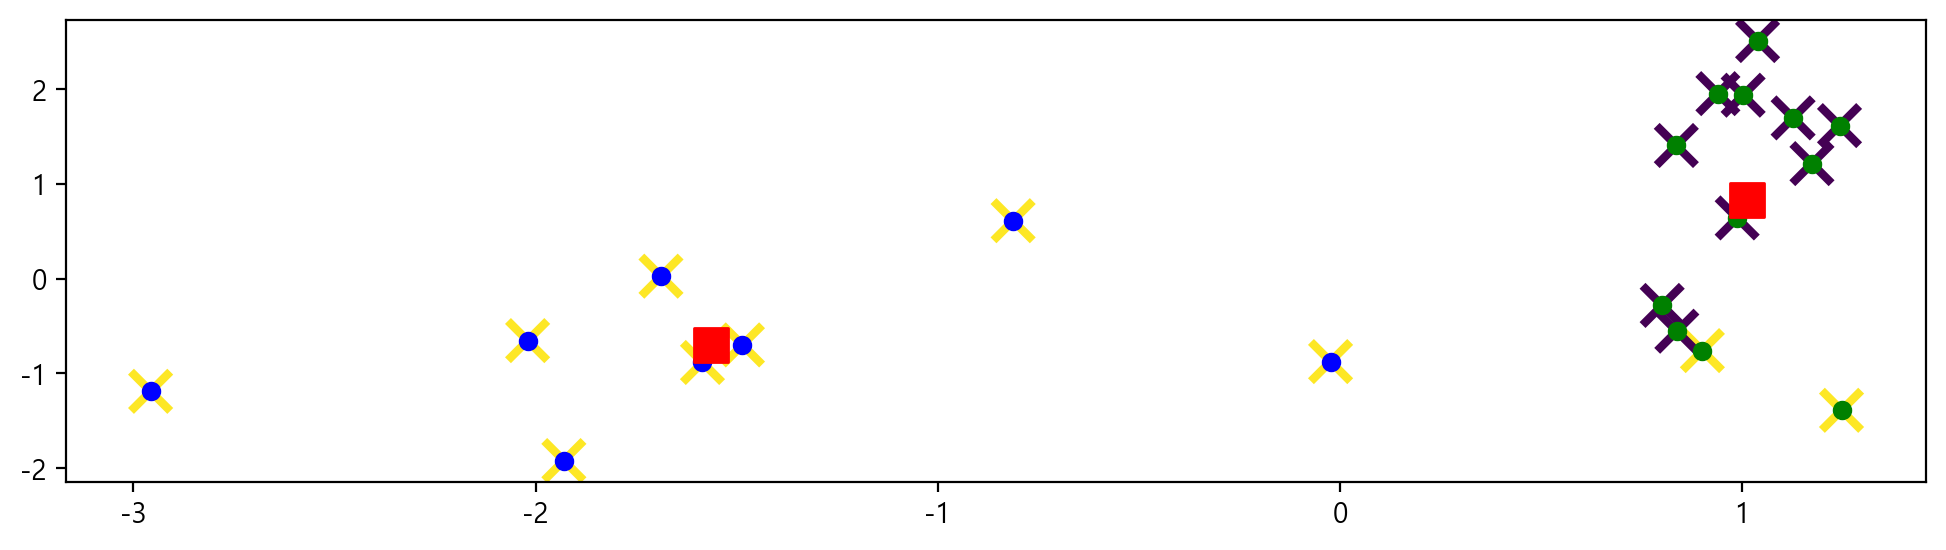

In [35]:
c0, c1 = model.cluster_centers_ # 중심점 2개
plt.figure(figsize=(12,3))
plt.scatter(x=X[:,0], y=X[:,1], marker='x', c=y, s=200, linewidth=3)
plt.scatter(x=X[model.labels_==0, 0],
           y=X[model.labels_==0, 1], marker='o', c='b')
plt.scatter(x=X[model.labels_==1, 0],
           y=X[model.labels_==1, 1], marker='o', c='g')
plt.scatter(x=c0[0],
           y=c0[1], marker='s', c='r', s=150)
plt.scatter(x=c1[0],
           y=c1[1], marker='s', c='r', s=150)
plt.show()

In [41]:
import pandas as pd
pd.crosstab(y, model.labels_, rownames=['실제값'],
                              colnames=['k-means값'])

k-means값,0,1
실제값,,
0,0,10
1,8,2


In [6]:
# 거리 계산시 스케일 조정
from sklearn.preprocessing import Normalizer
import pandas as pd
scaler = Normalizer()
Xn = scaler.fit_transform(X)
X_df = pd.DataFrame(X, columns=['x0', 'x1'])
Xn_df = pd.DataFrame(Xn, columns=['x0_nor', 'x1_nor'])
pd.concat([X_df, Xn_df], axis=1)

,x0,x1,x0_nor,x1_nor
0,1.038596,2.511754,0.382116,0.924114
1,1.002714,1.935215,0.460053,0.887892
2,-1.688105,0.025994,-0.999881,0.015397
3,0.901344,-0.758966,0.764937,-0.644105
4,0.836531,1.404882,0.511615,0.859215
5,-0.023176,-0.874812,-0.026484,-0.999649
6,0.837805,-0.554389,0.833951,-0.551839
7,-1.929572,-1.918940,-0.709057,-0.705151
8,-0.812496,0.611408,-0.799038,0.601281
9,1.126947,1.695701,0.553503,0.832847


In [7]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=2, init='k-means++', n_init=5, max_iter=300)
model.fit(Xn)
print('그룹결과 :', model.labels_)

그룹결과 : [0 0 1 0 0 1 0 1 1 0 0 0 0 1 0 1 1 1 0 0]


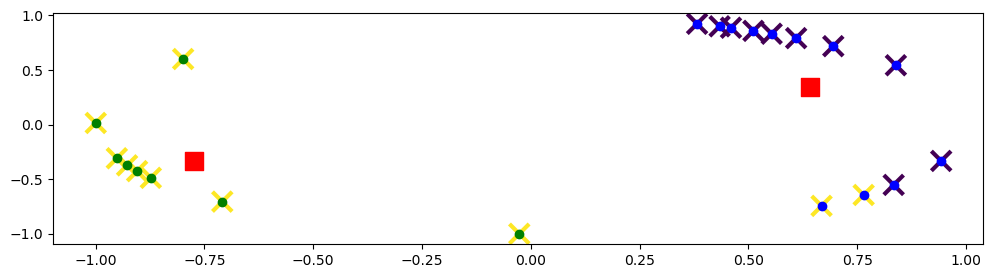

In [9]:
import matplotlib.pyplot as plt
c0, c1 = model.cluster_centers_ # 중심점 2개
plt.figure(figsize=(12,3))
plt.scatter(x=Xn[:,0], y=Xn[:,1], marker='x', c=y, s=200, linewidth=3)
plt.scatter(x=Xn[model.labels_==0, 0],
           y=Xn[model.labels_==0, 1], marker='o', c='b')
plt.scatter(x=Xn[model.labels_==1, 0],
           y=Xn[model.labels_==1, 1], marker='o', c='g')
plt.scatter(x=c0[0],
           y=c0[1], marker='s', c='r', s=150)
plt.scatter(x=c1[0],
           y=c1[1], marker='s', c='r', s=150)
plt.show()

In [19]:
# 회차별 군집 확인하기
def plot_cluster(model, data):
    c0, c1 = model.cluster_centers_
    plt.scatter(x=data[model.labels_==0, 0],
               y=data[model.labels_==0, 1], marker='o', c='b', s=100)
    plt.scatter(x=data[model.labels_==1, 0],
               y=data[model.labels_==1, 1], marker='o', c='g', s=100)
    plt.scatter(x=c0[0],
               y=c0[1], marker='s', c='r', s=150)
    plt.scatter(x=c1[0],
               y=c1[1], marker='s', c='r', s=150)
    return c0, c1

c0-0.73,-0.71, c11.04,1.62
c0-0.73,-0.71, c11.04,1.62
c0-0.73,-0.71, c11.04,1.62
c0-0.73,-0.71, c11.04,1.62
c0-0.73,-0.71, c11.04,1.62
c0-0.73,-0.71, c11.04,1.62


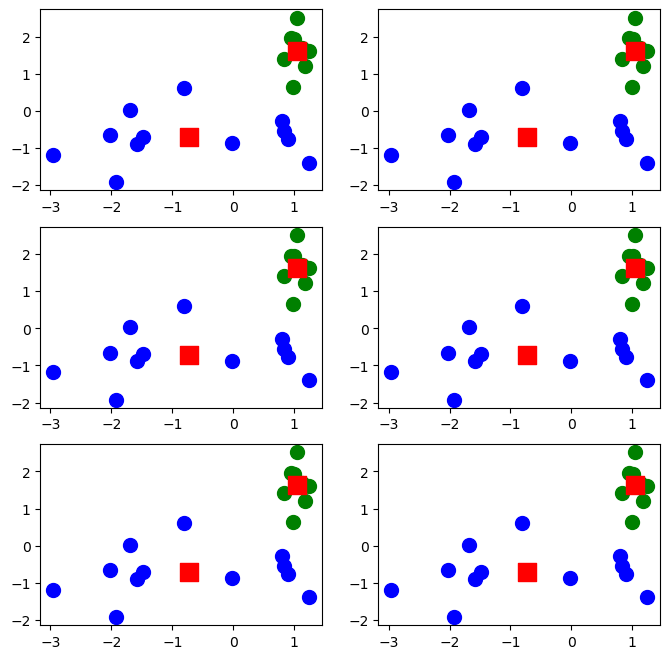

In [20]:
plt.figure(figsize=(8,8))
for i in range(1, 7):
    model = KMeans(n_clusters=2, init='random',
                  n_init=2,
                  max_iter=i,
                  random_state=1)
    model.fit(X)
    plt.subplot(3, 2, i)
    c0, c1 = plot_cluster(model, X)
    print("c0{:.2f},{:.2f}, c1{:.2f},{:.2f}".format(c0[0], c0[1], c1[0], c1[1]))
plt.show()

## K-Means 한계(pt. 13)
- 군의 특성이 다를 경우
    * 크기
    * 밀도
    * 비구형
- 이상치를 포함할 경우 : 이상치를 없애고 K-Means 적용 (이상치가있으면안됨)

### 군의 크기가 다를 경우

In [25]:
# normal(평균, 표준편차, size) : 정규분포 배열 생성
group0 = np.random.normal(-10, 2, (10, 2))
class0 = np.full(group0.shape[0], 0)
group0 = np.c_[group0, class0]
group0[:2] # 10행 3열

array([[ -6.84086318,  -9.04609552,   0.        ],
       [-11.72054563,  -7.76660152,   0.        ]])

In [27]:
group1 = np.random.normal(10, 2, (10, 2))
class1 = np.full(group1.shape[0], 1)
group1 = np.c_[group1, class1]
group1[:2] # 10행 3열

array([[12.13621752, 13.70159369,  1.        ],
       [11.8857766 ,  7.88922138,  1.        ]])

In [30]:
group2 = np.random.normal(0, 5, (100, 2))
class2 = np.full(group2.shape[0], 2)
group2 = np.c_[group2, class2]
group2[:2] # 100행 3열

array([[-0.63489184,  2.56475693,  2.        ],
       [-6.81600121, -1.24832981,  2.        ]])

In [31]:
data = np.r_[group0, group1, group2]
data[::10] # 120행 3열

array([[-6.84086318, -9.04609552,  0.        ],
       [12.13621752, 13.70159369,  1.        ],
       [-0.63489184,  2.56475693,  2.        ],
       [ 3.98971904,  2.18423795,  2.        ],
       [ 2.79885817,  0.43624579,  2.        ],
       [ 3.2986624 , -3.77229312,  2.        ],
       [-3.34853616, -1.25712562,  2.        ],
       [-5.7050222 , -7.66463407,  2.        ],
       [ 0.31871433,  3.07620533,  2.        ],
       [ 4.0458554 ,  2.29006425,  2.        ],
       [-3.59599278,  4.56780427,  2.        ],
       [ 3.92612452,  3.39715089,  2.        ]])

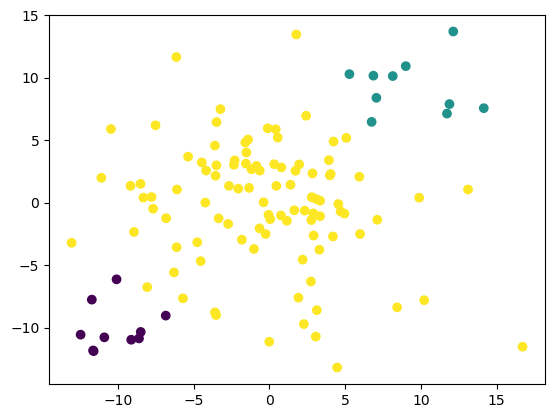

In [33]:
plt.scatter(x = data[:, 0],
           y = data[:, 1],
           c = data[:, 2])
plt.show()

In [39]:
model = KMeans(n_clusters=3,
              init='random',
              n_init=5)
model.fit(data[:,0:2])

KMeans(init='random', n_clusters=3, n_init=5)

In [43]:
model.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       0, 0, 1, 1, 0, 0, 1, 2, 1, 1, 0, 1, 1, 0, 0, 0, 2, 1, 0, 2, 1, 2,
       0, 2, 2, 1, 2, 0, 0, 1, 0, 2, 0, 2, 0, 2, 1, 1, 2, 2, 1, 0, 0, 1,
       2, 0, 1, 1, 2, 0, 1, 2, 2, 2, 1, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 2, 2, 0, 1, 0, 1, 1, 2, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1])

In [44]:
c = model.cluster_centers_
c

array([[ 3.68397192, -3.58509729],
       [ 1.37135183,  4.95877069],
       [-7.88273031, -4.59781156]])

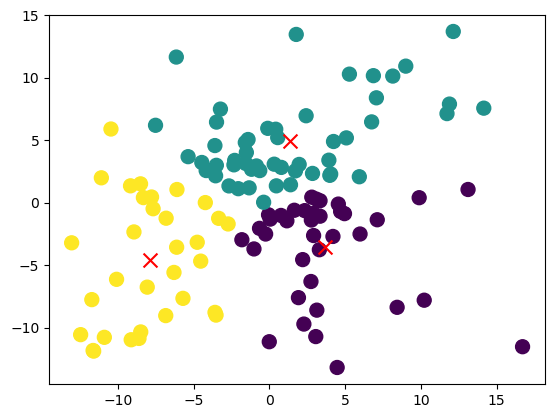

In [45]:
plt.scatter(x = data[:, 0],
           y = data[:, 1],
           c = model.labels_, s=100)
plt.scatter(x = c[:, 0], y=c[:, 1], c='r', s=100, marker='x')
plt.show()

In [46]:
# 군의 크기가 다를 경우의 K-Means 극복하기
model = KMeans(n_clusters=6, init='k-means++', n_init=5)
model.fit(data[:,0:2])

KMeans(n_clusters=6, n_init=5)

In [47]:
centers = model.cluster_centers_ # 중심점
colors = ['r','g','b','c','m','k']
markers = ['o','s','v','^','.','<']
model.labels_

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 5,
       1, 1, 0, 0, 1, 3, 0, 4, 1, 0, 3, 0, 1, 3, 1, 1, 5, 0, 1, 5, 0, 4,
       1, 4, 5, 1, 5, 1, 1, 0, 1, 5, 2, 5, 1, 5, 0, 0, 5, 5, 0, 1, 1, 0,
       5, 1, 0, 0, 4, 1, 1, 5, 5, 5, 0, 3, 1, 0, 0, 5, 0, 1, 0, 0, 1, 1,
       3, 3, 1, 4, 5, 3, 1, 1, 0, 2, 5, 0, 0, 3, 0, 1, 1, 3, 0, 0, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 3, 0])

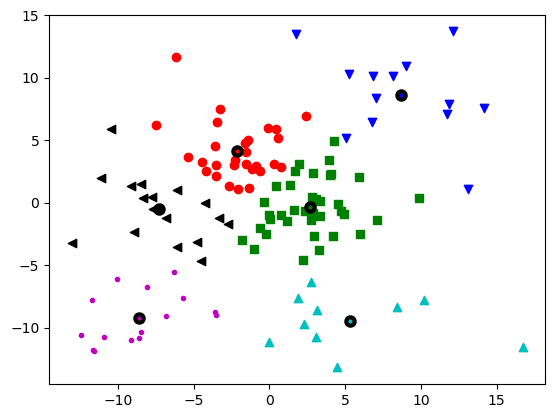

In [53]:
for i, c in enumerate(centers):
    if i in (0, 1, 2, 3, 4, 5) :
        plt.scatter(x=data[model.labels_==i,0], y=data[model.labels_==i,1],
                   c=colors[i], marker=markers[i])
        plt.scatter(x=c[0], y=c[1], c=colors[i], lw=3, edgecolors='k')

### 군이 비구형인 경우

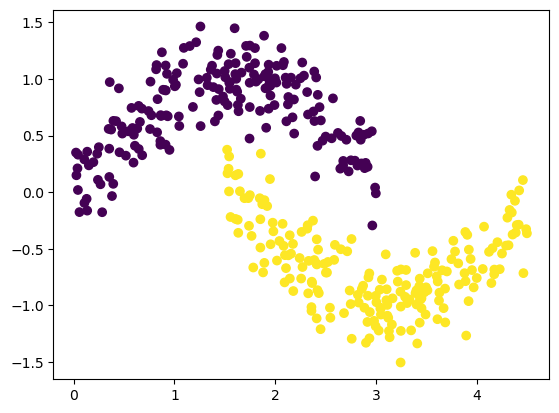

In [62]:
# rand(size) : 균등분포 size개 난수(0<=x<1) 발생
X1 = np.random.rand(200)*3
noise = np.random.normal(0, 0.2, X1.shape[0])
Y1 = np.sin(X1) + noise
group1 = np.c_[X1, Y1, np.full(X1.shape[0], 0)]

X2 = X1 + 1.5
Y2 = np.cos(X2) + noise
group2 = np.c_[X2, Y2, np.full(X2.shape[0], 1)]

data = np.r_[group1, group2]

plt.scatter(data[:,0], data[:,1], c=data[:,2])
plt.show()

** 군의 갯수를 몇으로 할지는 다음 단락의 실루엣갯수로 판단 **

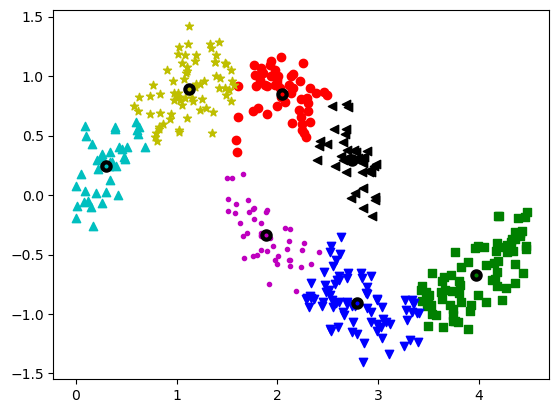

In [70]:
model = KMeans(n_clusters=7, init='k-means++', n_init=2)
model.fit(data[:,0:2])
centers = model.cluster_centers_ # 중심점
colors = ['r','g','b','c','m','k','y']
markers = ['o','s','v','^','.','<','*']
for i, c in enumerate(centers):
    plt.scatter(x=data[model.labels_==i, 0],
               y=data[model.labels_==i, 1],
               c=colors[i], marker=markers[i])
    plt.scatter(x=c[0], y=c[1], c=colors[i], edgecolors='k', lw=3)

# 3절. Hierachical
- 군까리 묶으면서 최종적으로는 하나의 군집이 될 때까지 클러스터링 하는 알고리즘
- dendrogram이라는 그래프를 이용하여 시각화
- 군의 갯수를 미리 정하지 않음

In [71]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.sample()

,sepal_length,sepal_width,petal_length,petal_width,species
89,5.5,2.5,4.0,1.3,versicolor


In [75]:
# 계층적 군집분석을 위해 모든 데이터는 다 수치화(species 라벨인코딩)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
iris['species'] = le.fit_transform(iris.species)
iris.iloc[::50]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
50,7.0,3.2,4.7,1.4,1
100,6.3,3.3,6.0,2.5,2


In [87]:
from scipy.cluster.hierarchy import linkage
cluster_model = linkage(iris, method='complete')
# method='complete' : 두 그룹의 특성 차이를 거리로 측정

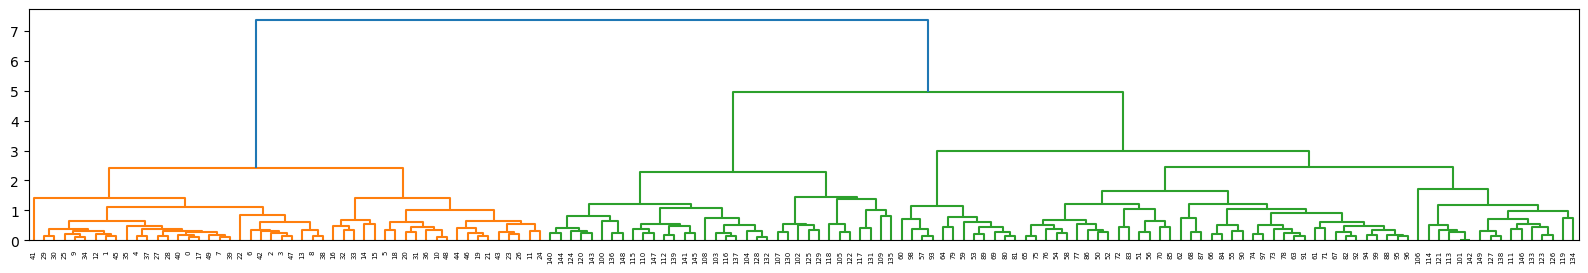

In [89]:
# 형성된 계층적 모델로 dendrogram
from scipy.cluster.hierarchy import dendrogram
plt.figure(figsize=(20,3))
dendrogram(cluster_model, labels=iris.index)
# 그림파일로 저장
plt.savefig('ch2_dendrogram.png', dpi=300, bbox_inches='tight')
plt.show()

In [90]:
# 임계값이 4일때 그룹
from scipy.cluster.hierarchy import fcluster
fcluster(cluster_model,
        t=4,
        criterion='distance')

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2,
       2, 3, 2, 3, 3, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 2, 3, 3, 2, 2, 2, 2,
       2, 3, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 3], dtype=int32)

In [91]:
fcluster(cluster_model,
        t=6,
        criterion='distance')

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [92]:
fcluster(cluster_model,
        t=2,
        criterion='distance')

array([1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2,
       1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2,
       2, 1, 2, 1, 2, 1, 6, 6, 6, 5, 6, 6, 6, 5, 6, 5, 5, 6, 6, 6, 5, 6,
       6, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 6, 6, 6, 6, 6, 6,
       6, 5, 6, 6, 6, 5, 6, 6, 6, 6, 5, 6, 3, 7, 4, 3, 3, 4, 7, 4, 3, 4,
       3, 7, 3, 7, 7, 3, 3, 4, 4, 7, 3, 7, 4, 7, 3, 4, 7, 7, 3, 4, 4, 4,
       3, 7, 7, 4, 3, 3, 7, 3, 3, 3, 7, 3, 3, 3, 7, 3, 3, 7], dtype=int32)

# 4절. DBSCAN 클러스터링
- 연결기반 군집화 알고리즘
- 클러스터의 수를 미리 정할 필요가 없음
- 이상치를 자동 감지
- eps(반경)과 min_samples(최소 샘플수)

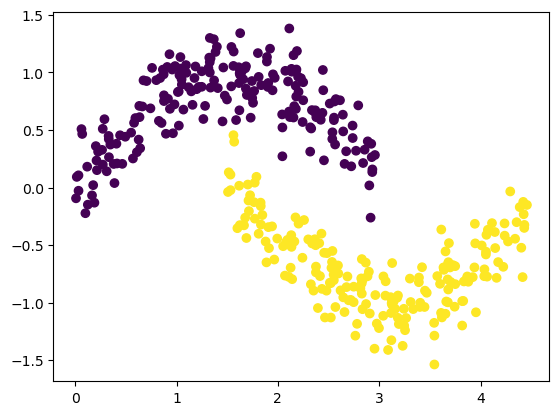

In [105]:
# rand(size) : 균등분포 size개 난수(0<=x<1) 발생
X1 = np.random.rand(200)*3
noise = np.random.normal(0, 0.2, X1.shape[0])
Y1 = np.sin(X1) + noise
group1 = np.c_[X1, Y1, np.full(X1.shape[0], 0)]

X2 = X1 + 1.5
Y2 = np.cos(X2) + noise
group2 = np.c_[X2, Y2, np.full(X2.shape[0], 1)]

data = np.r_[group1, group2]

plt.scatter(data[:,0], data[:,1], c=data[:,2])
plt.show()

In [106]:
from sklearn.cluster import DBSCAN
# 반경 0.3이내의 포인트들을 같은 그룹으로 묶음
db_model = DBSCAN(eps=0.3, min_samples=10)
db_model.fit(data[:,0:2])

DBSCAN(eps=0.3, min_samples=10)

In [108]:
labels = db_model.labels_
# labels가 -1은 이상치
set(labels)

3

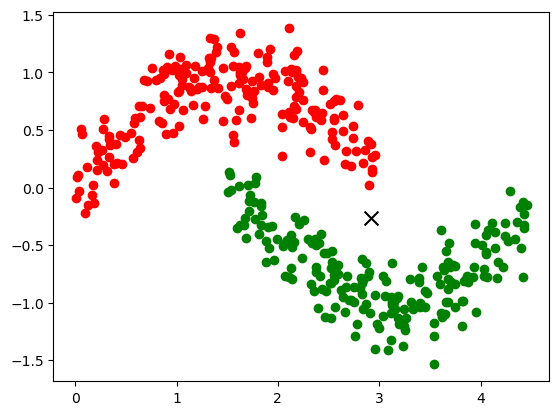

In [113]:
import matplotlib.pyplot as plt
colors = ['r','g']
for i in range(2):
    plt.scatter(x=data[labels==i, 0],
               y=data[labels==i, 1],
               c=colors[i])
plt.scatter(x=data[labels==-1, 0],
           y=data[labels==-1, 1],
           s=100,
           marker='x', c='k')
plt.show()

# 5절. 군집모형 성능평가
- 예측모형의 score (군집분석에서는 안 씀)
- metrics함수 : 분류, 회귀, 군집모형에서 평가
- 그외 여러 함수

In [118]:
iris = sns.load_dataset('iris')
iris_X = iris.iloc[:,:-1]
iris_y = iris.iloc[:,-1] # setosa ....
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
iris_y_enc = le.fit_transform(iris_y) # 0, 1, 2
iris_y[::50], iris_y_enc[::50]

(0          setosa
 50     versicolor
 100     virginica
 Name: species, dtype: object,
 array([0, 1, 2]))

In [119]:
# iris_X : 독립변수
# iris_y : 종별 이름(문자)
# iris_y_enc : 종별 이름을 인코딩 0, 1, 2

In [121]:
model3 = KMeans(n_clusters=3, random_state=1, n_init=10)
model3.fit(iris_X)

KMeans(n_clusters=3, n_init=10, random_state=1)

In [125]:
pred3 = model3.predict(iris_X)
all(pred3 == model3.labels_)

True

In [126]:
pred3

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [127]:
np.choose([1,1,1,0,0,2,2],[0,10,20])

array([10, 10, 10,  0,  0, 20, 20])

In [129]:
pred3 = np.choose(model3.labels_, [1, 0, 2])
pred3

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [130]:
pd.crosstab(iris_y_enc, pred3)

col_0,0,1,2
row_0,,,
0,50,0,0
1,0,48,2
2,0,14,36


In [132]:
pred3_str = le.inverse_transform(pred3)
pd.crosstab(iris_y, pred3_str)

col_0,setosa,versicolor,virginica
species,,,
setosa,50,0,0
versicolor,0,48,2
virginica,0,14,36


## 5.1 조정된 rand지수

In [133]:
from sklearn.metrics import adjusted_rand_score
adjusted_rand_score(labels_true=iris_y,
                   labels_pred=pred3_str)

0.7302382722834697

In [134]:
adjusted_rand_score(labels_true=iris_y_enc,
                   labels_pred=pred3)

0.7302382722834697

In [136]:
from sklearn.metrics import homogeneity_score
homogeneity_score(iris_y, pred3_str)

0.7514854021988338

In [139]:
from sklearn.metrics import completeness_score
completeness_score(iris_y, pred3_str)

0.7649861514489815

In [140]:
from sklearn.metrics import v_measure_score
v_measure_score(iris_y, pred3_str)

0.7581756800057784

In [141]:
from sklearn.metrics import mutual_info_score # 상호 그룹간 의존도를 나타내는 지표
mutual_info_score(iris_y, pred3_str)

0.8255910976103356

## 5.2 실루엣 계수
- 클러스터 소속도 모르고, 클러스터 갯수도 모를 때 평가하는 방법

In [144]:
from sklearn.metrics import silhouette_score
silhouette_score(iris_X, model3.labels_)

0.5528190123564102

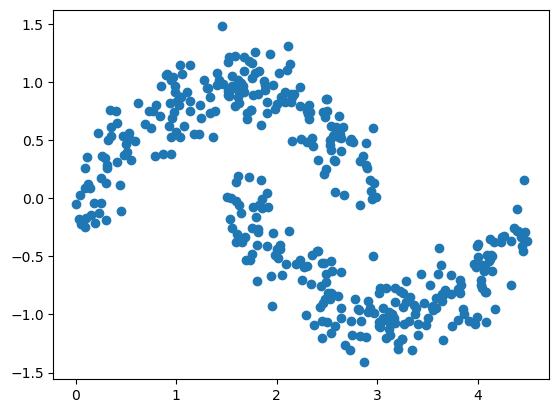

In [143]:
X1 = np.random.rand(200)*3
noise = np.random.normal(0, 0.2, X1.shape[0])
Y1 = np.sin(X1) + noise
group1 = np.c_[X1, Y1]

X2 = X1 + 1.5
Y2 = np.cos(X2) + noise
group2 = np.c_[X2, Y2]

data = np.r_[group1, group2]

plt.scatter(data[:,0], data[:,1])
plt.show()

In [148]:
# 실루엣 계수를 이용하여 몇개 그룹으로 클러스터링하는게 제일 좋은지 판별
range_n_clusters = [2,3,4,5,6,7,8,9,10]
for n_clusters in range_n_clusters:
    model = KMeans(n_clusters=n_clusters,
                  n_init=10,
                  random_state=2)
    model.fit_transform(data)
    s_score = silhouette_score(data, model.labels_)
    print('클러스터 수가 {} 일때 실루엣 계수가 {}'.format(n_clusters, s_score))

클러스터 수가 2 일때 실루엣 계수가 0.5275028029111284
클러스터 수가 3 일때 실루엣 계수가 0.4655903912452947
클러스터 수가 4 일때 실루엣 계수가 0.4651199656668842
클러스터 수가 5 일때 실루엣 계수가 0.44960607180639234
클러스터 수가 6 일때 실루엣 계수가 0.5008798654227712
클러스터 수가 7 일때 실루엣 계수가 0.5040105290186107
클러스터 수가 8 일때 실루엣 계수가 0.4909857133864069
클러스터 수가 9 일때 실루엣 계수가 0.48234065700448947
클러스터 수가 10 일때 실루엣 계수가 0.4562384212205977


# 6절. 연습문제

In [149]:
# 1. iris 데이터의 petal_length열과 petal_width열을
# 이용해서 K-Means 알고리즘으로 군집분석하고
# 그래프로 시각화하세요(단, 각 클러스터의 중심점이
# 함께 표시되고 군의 수는 2로 설정

In [183]:
X = iris[['petal_length', 'petal_width']].values
model = KMeans(n_clusters=2,
               init='random',
              n_init=5).fit(X)

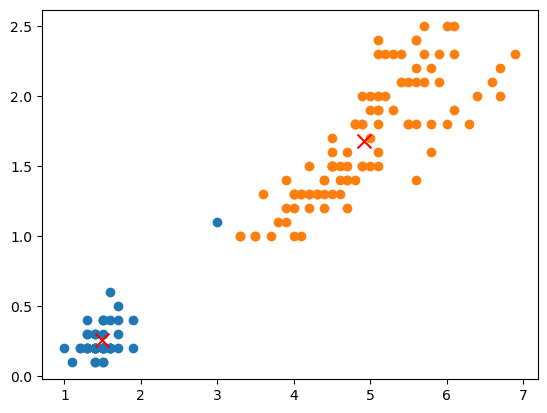

In [189]:
centers = model.cluster_centers_ # 중심점 2개
plt.scatter(x = X[model.labels_==0, 0],
           y = X[model.labels_==0, 1],)
plt.scatter(x = X[model.labels_==1, 0],
           y = X[model.labels_==1, 1],)
plt.scatter(x=centers[:,0], 
            y=centers[:, 1], marker='x', c='r', s=150)

In [191]:
# 실루엣 계수
from sklearn.metrics import silhouette_score
silhouette_score(X, model.labels_)

0.7653904101258123

In [192]:
# 클러스터 갯수가 3
model3 = KMeans(n_clusters=3,
              init='random',
              n_init=5).fit(X)

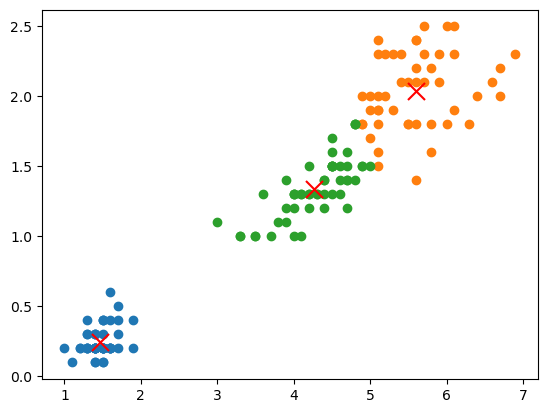

In [195]:
centers = model3.cluster_centers_ # 중심점 2개
plt.scatter(x = X[model3.labels_==0, 0],
           y = X[model3.labels_==0, 1],)
plt.scatter(x = X[model3.labels_==1, 0],
           y = X[model3.labels_==1, 1],)
plt.scatter(x = X[model3.labels_==2, 0],
           y = X[model3.labels_==2, 1],)
plt.scatter(x=centers[:,0], 
            y=centers[:, 1], marker='x', c='r', s=150)